In [123]:
import pandas as pd

In [124]:
df = pd.read_csv('../data/tips.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [125]:
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [126]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [127]:
renomear_columns = {
'total_bill':'valor_da_conta', 
'tip':'gorjeta', 
'dessert':'sobremesa', 
'day':'dia_da_semana', 
'time':'hora_do_dia', 
'size':'total_de_pessoas'
}

In [128]:
gorjetas = df.rename(columns=renomear_columns)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [129]:
# visualizar todos os tipos
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [130]:
sim_nao = {'No':'Não', 'Yes':'Sim'}

In [131]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [132]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [133]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [134]:
dias_da_semana = {'Sun':'Domingo', 'Sat':'Sabado','Thur':'Quinta','Fri':'Sexta'}
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias_da_semana)
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

In [135]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [136]:
hora_do_dia = {'Dinner':'Jantar', 'Lunch':'Almoço'}
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora_do_dia)
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [137]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [138]:
import seaborn as sns

### Análise 1 - Valor da conta aumenta o valor da gorjeta?

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

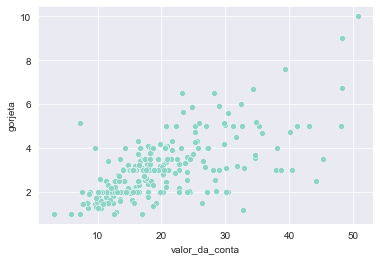

In [139]:
sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

Visualmente o valor da gorjeta aumenta conforme o valor da conta

In [140]:
print("A base de dados contém {} registros \n".format(gorjetas.shape[0]))
print('A base de dados contém {} valores nulos \n'.format(gorjetas[gorjetas.valor_da_conta.isna()]))

A base de dados contém 244 registros 

A base de dados contém Empty DataFrame
Columns: [valor_da_conta, gorjeta, sobremesa, dia_da_semana, hora_do_dia, total_de_pessoas]
Index: [] valores nulos 



In [141]:
gorjetas.count()

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

Criando novo campo porcentagem

In [142]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta).round(2)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sabado,Jantar,3,0.20
240,27.18,2.00,Sim,Sabado,Jantar,2,0.07
241,22.67,2.00,Sim,Sabado,Jantar,2,0.09
242,17.82,1.75,Não,Sabado,Jantar,2,0.10


<AxesSubplot:xlabel='valor_da_conta', ylabel='porcentagem'>

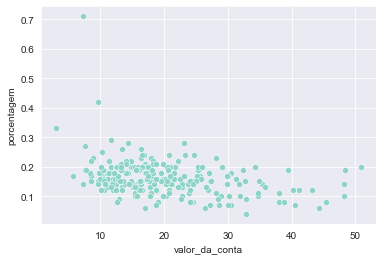

In [143]:
sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

Visualmente o valor da conta não é proporcional ao valor da gorjeta

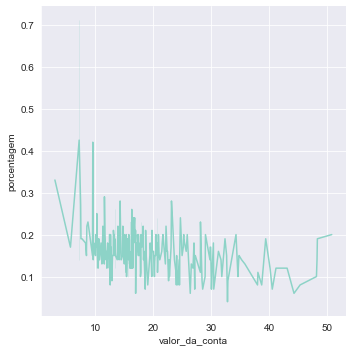

In [144]:
sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas, kind='line')

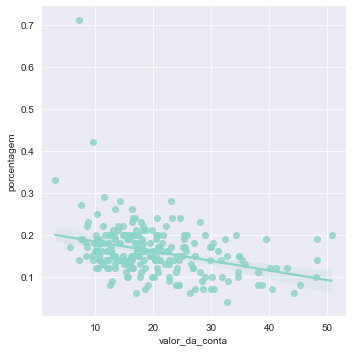

In [145]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

### Análise 2 - Sobremesa

In [146]:
gorjetas.query('sobremesa == "Sim"').describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [147]:
gorjetas.query('sobremesa == "Não"').describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


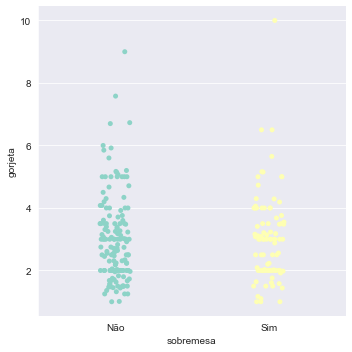

In [148]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

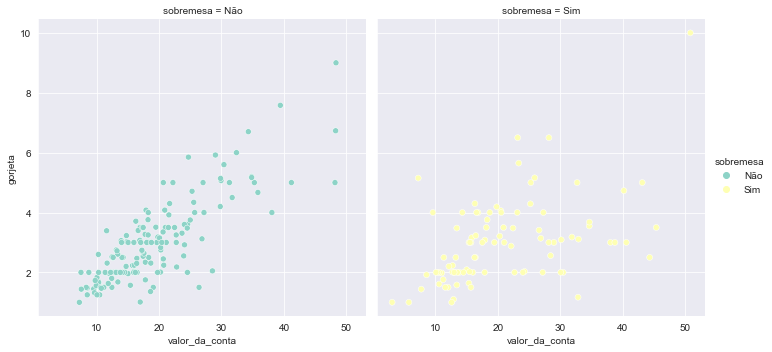

In [149]:
sns.relplot(x='valor_da_conta', y='gorjeta', data=gorjetas, hue='sobremesa', col='sobremesa')

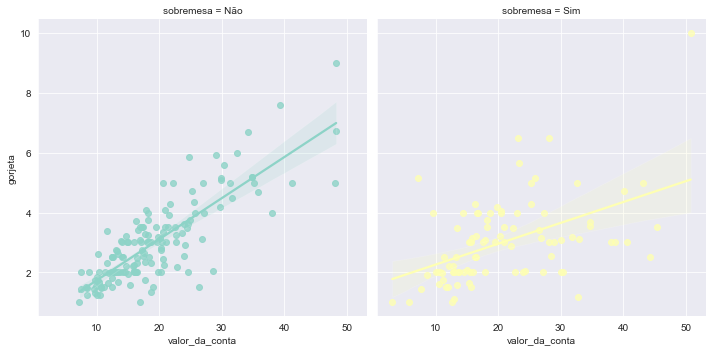

In [150]:
sns.lmplot(x='valor_da_conta', y='gorjeta', data=gorjetas, hue='sobremesa', col='sobremesa')

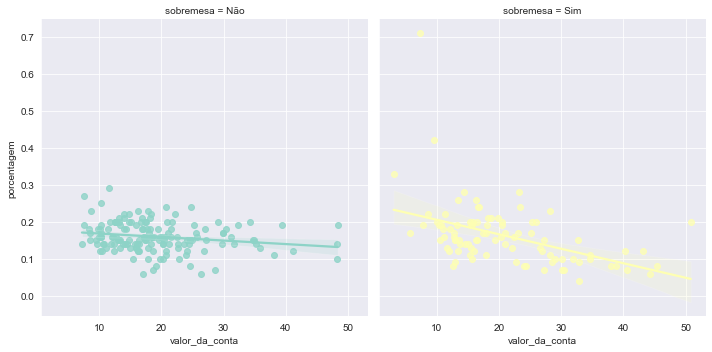

In [151]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas, hue='sobremesa', col='sobremesa')

Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram

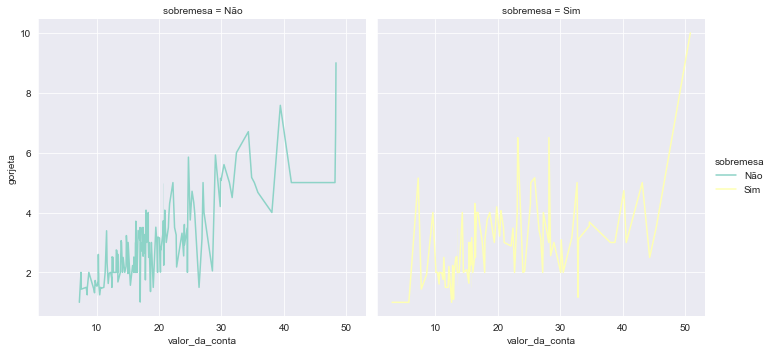

In [152]:
sns.relplot(x='valor_da_conta', y='gorjeta', data=gorjetas, hue='sobremesa', col='sobremesa', kind='line')

### Teste de hipótese

In [153]:
from scipy.stats import ranksums

In [156]:
# Distribuição da taxa da gorjeta é a mesma nos dois grupos

# Trazer a porcentagem de todas as pessoas que deram gorjeta
per_sobremesa_sim = gorjetas.query('sobremesa == "Sim"').porcentagem

In [157]:
# Distribuição da taxa da gorjeta NÃO é a mesma nos dois grupos
per_sobremesa_nao = gorjetas.query('sobremesa == "Não"').porcentagem

In [160]:
r = ranksums(per_sobremesa_sim, per_sobremesa_nao)
print("O Valor do p-value é {}".format(r.pvalue))
# diferença 0.52
# A distribuição entre os dois grupos é a mesma em porcentagem

O Valor do p-value é 0.5266635660124415


In [161]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


### Análise 3 - Dia da semana

Quais dias da semana as pessoas tem gastado mais

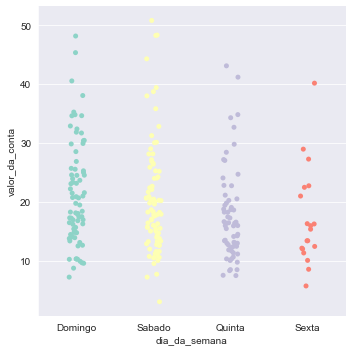

In [163]:
sns.catplot(x="dia_da_semana", y="valor_da_conta", data=gorjetas)

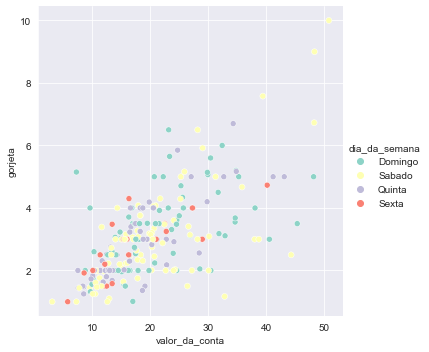

In [165]:
sns.relplot(x='valor_da_conta', y="gorjeta", data=gorjetas, hue='dia_da_semana')

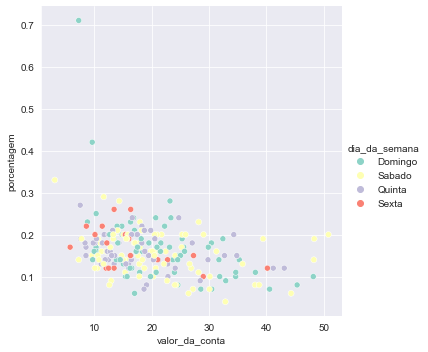

In [166]:
sns.relplot(x='valor_da_conta', y="porcentagem", data=gorjetas, hue='dia_da_semana')


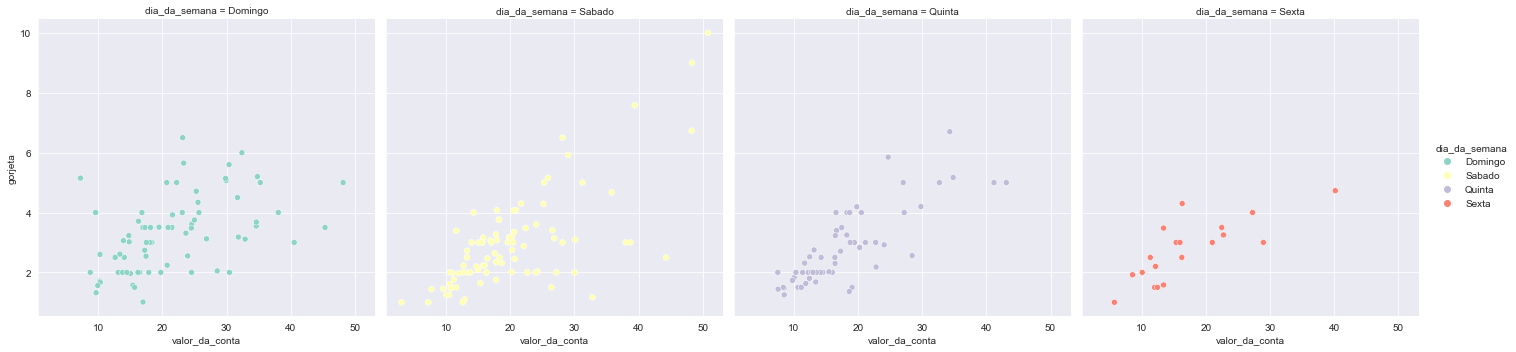

In [168]:
sns.relplot(x='valor_da_conta', y="gorjeta", data=gorjetas, hue='dia_da_semana', col='dia_da_semana')

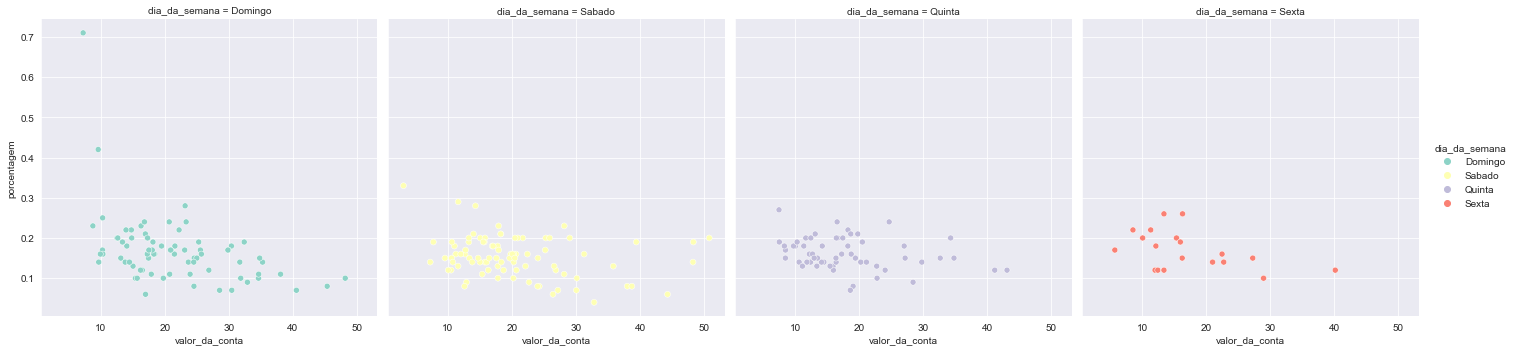

In [169]:
sns.relplot(x='valor_da_conta', y="porcentagem", data=gorjetas, hue='dia_da_semana', col='dia_da_semana')


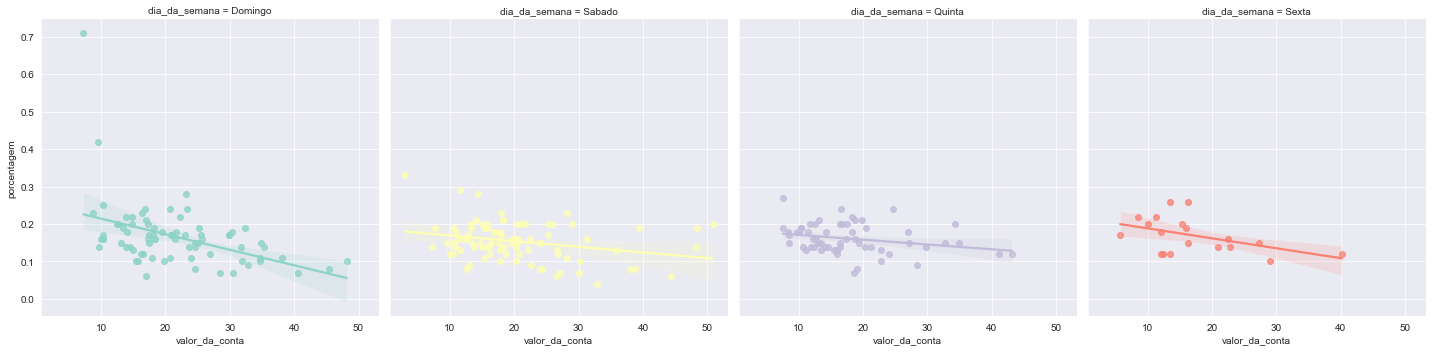

In [172]:
sns.lmplot(x='valor_da_conta', y="porcentagem", data=gorjetas, hue='dia_da_semana', col='dia_da_semana')


In [176]:
print("A média geral das gorjetas é de {} ".format(gorjetas.gorjeta.mean().round(2)))

A média geral das gorjetas é de 3.0 


In [180]:
# média de todos os dias da semana
gorjetas.groupby(by=['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [181]:
print("Frequência dos dias")
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

A distribuição do valor da conta é igual no sábado e no domingo

In [184]:
dom_valor_da_conta = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [187]:
sab_valor_da_conta = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta


In [194]:
r2 = ranksums(dom_valor_da_conta, sab_valor_da_conta)
print("O valor p-value é {} então a distribuição do valor da conta é igual".format(r2.pvalue.round(2)))

O valor p-value é 0.36 então a distribuição do valor da conta é igual


Se o número do p-value fosse menor que 0.05 então a distribuição do valor da conta no Sábado
seria menor que no Domingo

In [195]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [196]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

### Análise 4 - Hora do dia

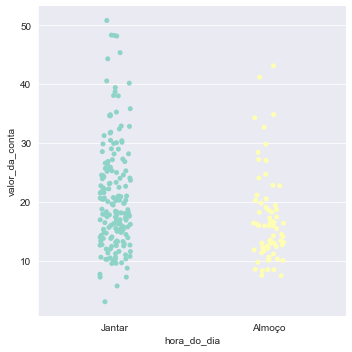

In [197]:
sns.catplot(x="hora_do_dia", y="valor_da_conta", data=gorjetas)

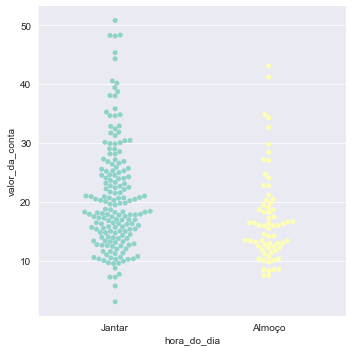

In [198]:
sns.catplot(x="hora_do_dia", y="valor_da_conta", data=gorjetas, kind='swarm')


<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

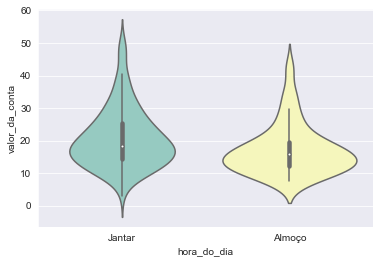

In [200]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

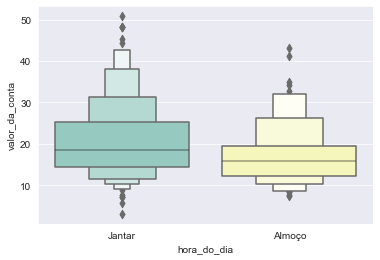

In [201]:
sns.boxenplot(x="hora_do_dia", y="valor_da_conta", data=gorjetas)

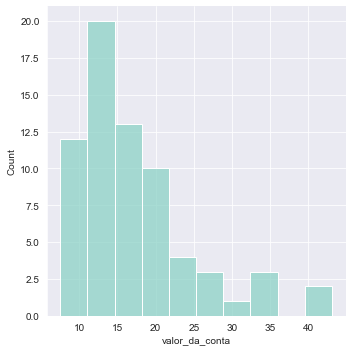

In [203]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.displot(almoco)

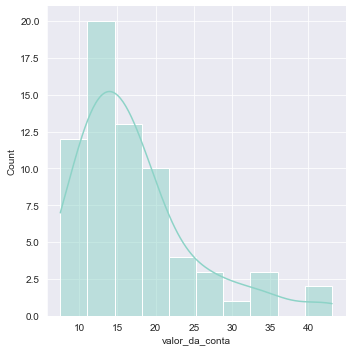

In [205]:
sns.displot(almoco, kde=True)

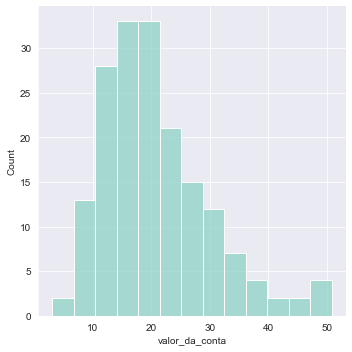

In [206]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
sns.displot(jantar)

In [208]:
gorjetas.groupby(by=['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [214]:
print("O valor do p-value {} ".format(ranksums(jantar, almoco).pvalue.round(3)))

O valor do p-value 0.001 


A distribuição do valor da conta não é igual no jantar e no almoço  
devido o valor de hipótese ser menor que `0.05`

In [216]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
print("A valor do p-value {}".format(ranksums(porcentagem_almoco, porcentagem_jantar).pvalue.round(3)))

A valor do p-value 0.26


A distribuição da taxa de gorjeta é igual no jantar e no almoço  
devido o valor `p-value` ser maior que `0.05`